Dataset Link:

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
#importing different python Libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv 
import seaborn as sns

In [2]:
#machine learning models library
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
from requests import get
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [5]:
from sklearn import metrics,tree,datasets,svm
from sklearn.metrics import classification_report,confusion_matrix


In [7]:
df = pd.read_csv("car data.csv")

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.shape

(301, 9)

In [10]:
for i in ['Fuel_Type','Seller_Type','Transmission','Owner']:
  print(df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.shape

(301, 9)

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

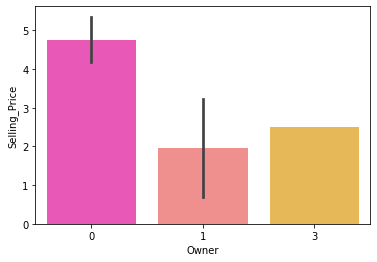

In [15]:
sns.barplot(x='Owner',y='Selling_Price',data=df,palette='spring')

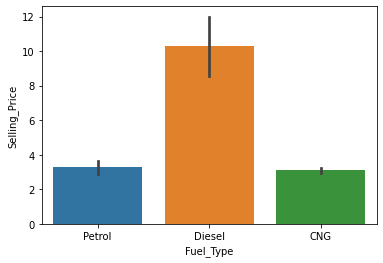

In [16]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df)

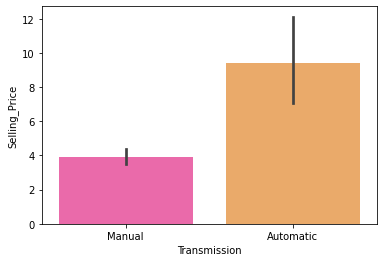

In [17]:
sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='spring')


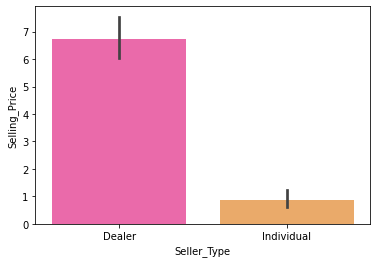

In [18]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=df,palette='spring')


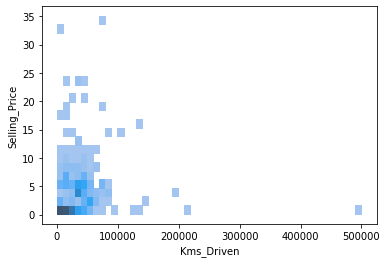

In [19]:
sns.histplot(x='Kms_Driven',y='Selling_Price',data=df)


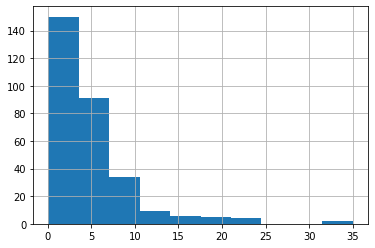

In [20]:
df.Selling_Price.hist()


In [21]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [22]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
33,ertiga,2014,6.00,9.95,45000,Diesel,Dealer,Manual,0
207,grand i10,2015,5.15,5.70,34797,Petrol,Dealer,Automatic,0
183,Bajaj Discover 100,2013,0.27,0.47,21000,Petrol,Individual,Manual,0
30,ritz,2012,3.10,5.98,51439,Diesel,Dealer,Manual,0
279,city,2014,6.25,13.60,40126,Petrol,Dealer,Manual,0


In [23]:
df.drop(['Car_Name'],axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df['Current_Year'] = 2020
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [25]:

df['no_year'] = df['Current_Year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [26]:
df.drop(['Year'],axis=1, inplace=True)
df.drop(['Owner'],axis=1, inplace=True)
df.drop(['Current_Year'],axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,6


In [27]:
df.sample(4)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,no_year
290,4.5,6.40,19000,Petrol,Dealer,Manual,6
229,3.1,6.79,52132,Diesel,Dealer,Manual,8
225,2.7,4.60,22517,Petrol,Dealer,Manual,9
93,23.0,30.61,40000,Diesel,Dealer,Automatic,5


In [28]:
df = pd.get_dummies(df, drop_first=True)


In [29]:
df.sample(5)

,Selling_Price,Present_Price,Kms_Driven,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
191,0.20,0.57,25000,8,0,1,1,1
293,3.25,9.90,38000,10,0,1,0,1
195,0.18,0.32,35000,5,0,1,1,1
117,1.10,1.90,14000,5,0,1,1,1
40,5.85,7.87,24524,4,0,1,0,0


In [30]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.172515,-0.172874,-0.101419,-0.162510
no_year,-0.236141,0.047584,0.524342,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [31]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.36139701 0.04121423 0.07707859 0.24636942 0.00610605 0.14014782
 0.12768689]


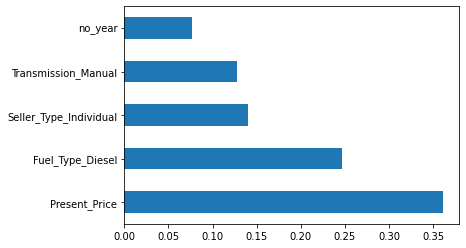

In [33]:
print(model.feature_importances_)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape

(240, 7)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()


In [36]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [39]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
predictions = rf_random.predict(X_test)
predictions

array([10.38170357,  0.63102115,  2.64581385,  0.68744813,  5.26034269,
        5.3661979 , 20.49626315,  0.23869368,  0.5863993 ,  4.36635959,
        0.58243205,  7.94425726,  4.71162027,  0.44334718,  4.71206365,
        3.9099762 ,  4.71616072,  0.21384865,  2.81951521,  7.37963025,
        0.68744813,  3.79095396,  6.91729683, 20.56693612,  0.2886038 ,
        0.42369627,  0.34918319,  0.30744182,  0.68491465,  0.21400222,
        2.60252708, 12.24127622,  4.9527546 , 10.53576295,  0.5658554 ,
        5.38835923,  2.82883088,  3.49962387,  1.11753183,  4.44832021,
        4.67137782,  0.48360618,  5.3970861 ,  0.26943417, 11.33331995,
        3.30387276,  0.24326196,  4.59229431,  6.77679983,  2.57779674,
        0.39630512,  5.82334712,  0.52829395, 10.16284174,  4.55198748,
        2.93917924, 10.81636842,  1.10235366,  8.03884777,  9.62553696,
        2.79208857])

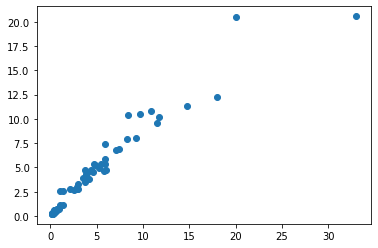

In [41]:
plt.scatter(Y_test, predictions)

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.7557931907447533
MSE: 3.6815112784219313
RMSE: 1.9187264730601732


In [43]:
import pickle
# open a file, where you ant to store the data
file = open('D:\random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)